<a href="https://colab.research.google.com/github/Varun0801/MachineLearning/blob/master/LoRg_98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('/content/soil_fertility.csv')
data.head()

,N,P,K,ph,ec,fertility
0,138,8.6,560,7.46,0.62,0
1,213,7.5,338,7.62,0.75,0
2,163,9.6,718,7.59,0.51,0
3,157,6.8,475,7.64,0.58,0
4,270,9.9,444,7.63,0.40,1


In [3]:
print(data.shape)

(880, 6)


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N          880 non-null    int64  
 1   P          880 non-null    float64
 2   K          880 non-null    int64  
 3   ph         880 non-null    float64
 4   ec         880 non-null    float64
 5   fertility  880 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 41.4 KB
None


In [7]:
print(data.describe())

               N           P           K          ph          ec   fertility
count  880.00000  880.000000  880.000000  880.000000  880.000000  880.000000
mean   246.73750   14.562159  499.978409    7.510500    0.543659    0.573864
std     77.38886   21.967755  124.222838    0.464912    0.141597    0.573593
min      6.00000    2.900000   11.000000    0.900000    0.100000    0.000000
25%    201.00000    6.800000  412.000000    7.350000    0.430000    0.000000
50%    257.00000    8.100000  475.000000    7.500000    0.545000    1.000000
75%    307.00000   10.550000  581.000000    7.630000    0.640000    1.000000
max    383.00000  125.000000  887.000000   11.150000    0.950000    2.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


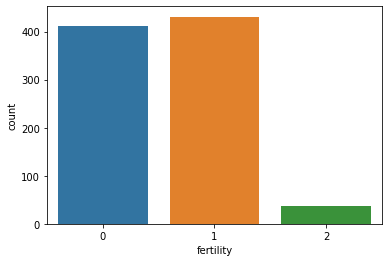

In [8]:
sns.countplot(data['fertility'])


In [17]:
data1 = data.drop(data[data['fertility'] == 2].index)
print(data1)
print(data['fertility'].value_counts())

       N     P    K    ph    ec  fertility
0    138   8.6  560  7.46  0.62          0
1    213   7.5  338  7.62  0.75          0
2    163   9.6  718  7.59  0.51          0
3    157   6.8  475  7.64  0.58          0
4    270   9.9  444  7.63  0.40          1
..   ...   ...  ...   ...   ...        ...
874  326  10.3  507  7.88  0.71          1
875  351  10.7  623  7.96  0.51          1
876  264   9.0  486  7.24  0.47          1
877  276   9.2  370  7.62  0.62          1
879  264  10.3  475  7.49  0.74          0

[843 rows x 6 columns]
1    431
0    412
Name: fertility, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Code starts here
df = data1
print(df.head())
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=6)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

     N    P    K    ph    ec  fertility
0  138  8.6  560  7.46  0.62          0
1  213  7.5  338  7.62  0.75          0
2  163  9.6  718  7.59  0.51          0
3  157  6.8  475  7.64  0.58          0
4  270  9.9  444  7.63  0.40          1
(843, 5)
(843,)
(674, 5)
(169, 5)
(674,)
(169,)


           N         P         K        ph        ec
N   1.000000 -0.048987  0.035406  0.045198  0.012284
P  -0.048987  1.000000  0.061887 -0.005858 -0.001132
K   0.035406  0.061887  1.000000  0.007609 -0.071874
ph  0.045198 -0.005858  0.007609  1.000000  0.081530
ec  0.012284 -0.001132 -0.071874  0.081530  1.000000


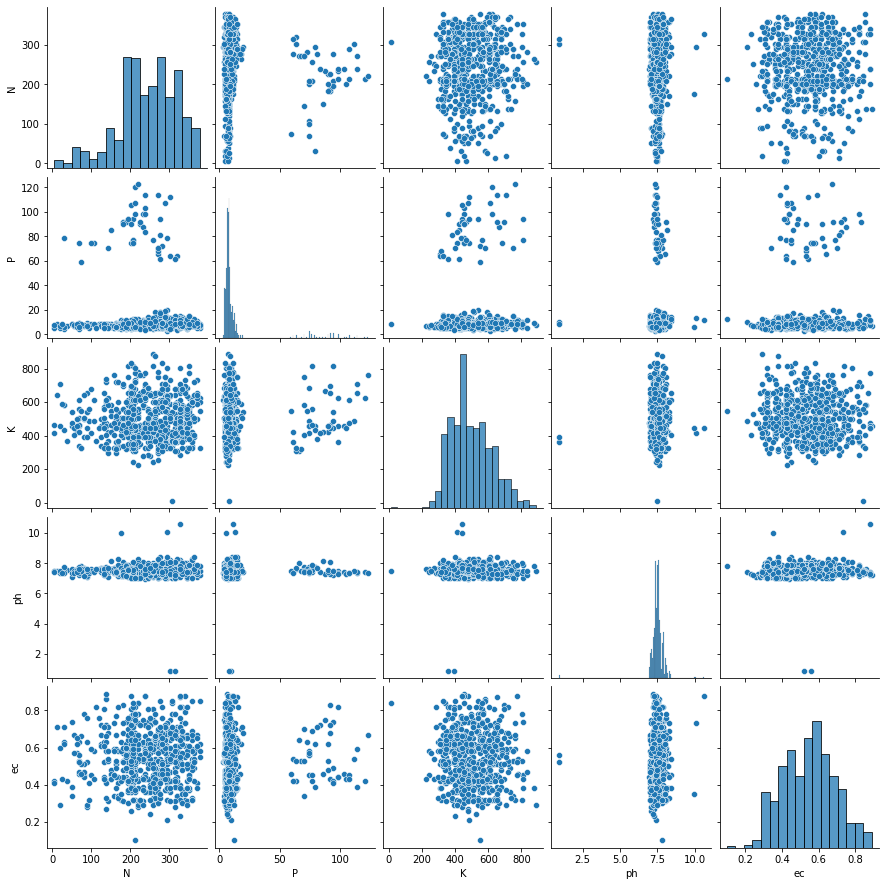

In [19]:
relation = X_train.corr()
print(relation)
sns.pairplot(X_train)

IndexError: ignored

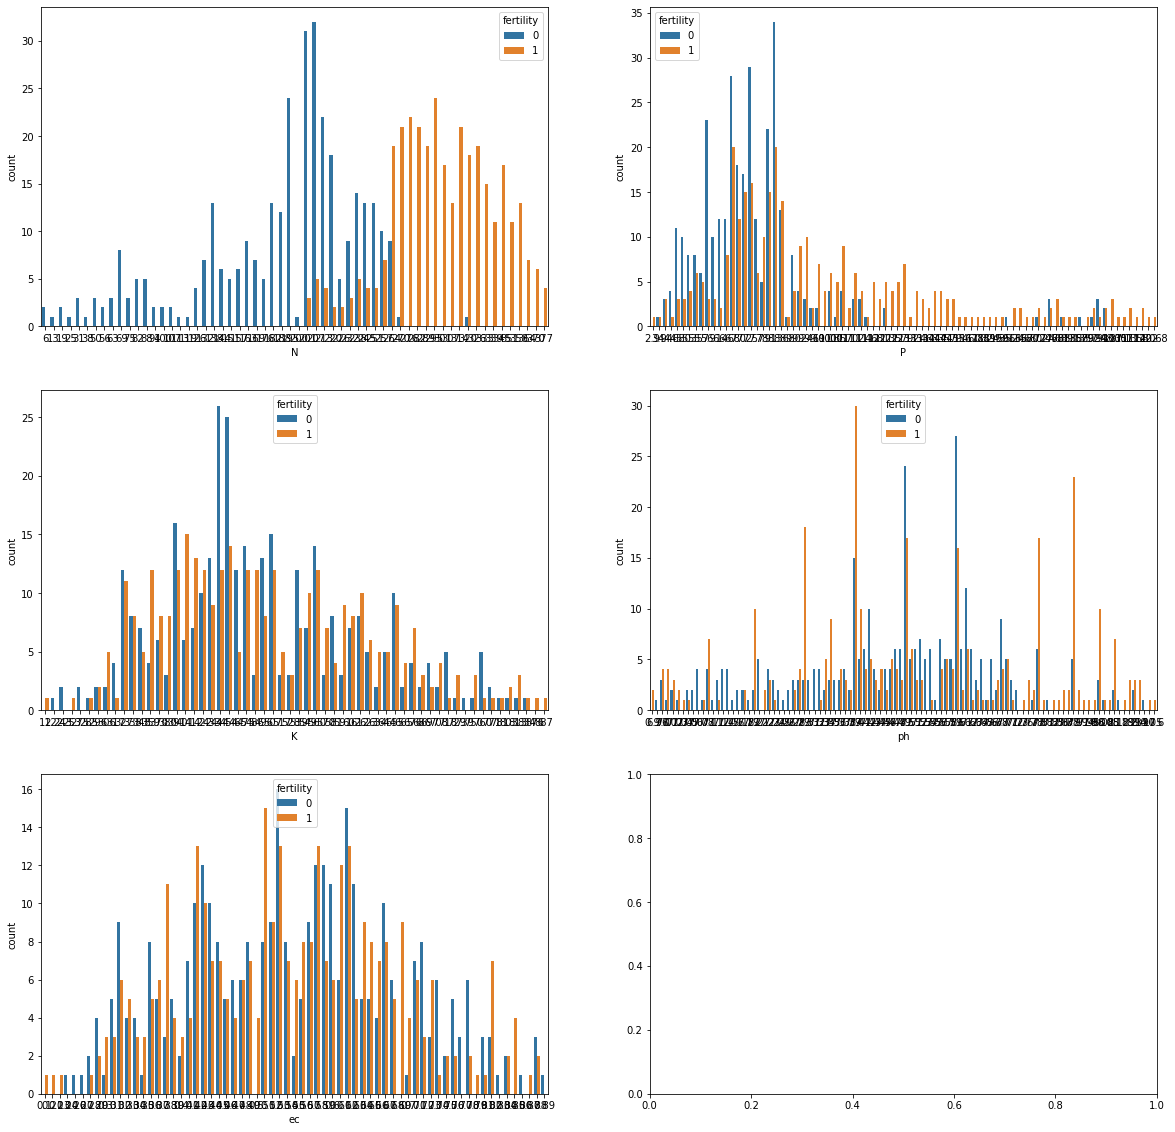

In [23]:
cols = ['N','P','K','ph','ec']       
# create subplot 
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
# create loop for plotting countplot
for i in range(0,3):
    for j in range(0,2):
             col=cols[i*2 + j]
             sns.countplot(x=X_train[col], hue=y_train, ax=axes[i,j])

In [24]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# parameters for grid search
parameters = {'C':[0.1,0.5,1,5]}

# Code starts here
lr = LogisticRegression(random_state=9)
grid = GridSearchCV(lr,param_grid = parameters)
grid.fit(X_train,y_train)
y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.9467455621301775


0.9453900709219859
0.25787031082113915
0.9811347517730498


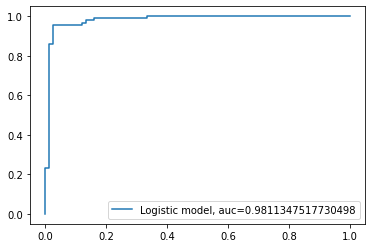

0.95
0.26
0.98


In [25]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
score = roc_auc_score( y_test, y_pred)
print(score)
y_pred_proba = grid.predict_proba(X_test)[:,1]
print(y_pred_proba[0])
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(roc_auc)
plt.plot(fpr,tpr,label="Logistic model, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
print(round(score,2))
print(round(y_pred_proba[0],2))
print(round(roc_auc,2))